<a href="https://colab.research.google.com/github/jay67nie/ML_Project/blob/Decision_Trees/Bank_Term_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')




df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
original_df = df

bold = "\033[1m"+"\033[4m"
reset = "\033[0m"+"\033[0m"
newline = "\n"


#Check for nulls and duplicates
print(bold + "Sneek Peek" + reset + newline)

print(df, newline)


print(bold + "Null values" + reset, newline)
print(df.isnull().sum(), newline) 

print(bold + "Duplicated values:" + reset, df.duplicated().sum(), newline)


#Separate target column and other features
target = df['tp']
data = df.drop('tp', axis=1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sneek Peek

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

for column in df.columns:
    # check if the column contains non-numeric values
    if df[column].dtype == object:
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # if the column cannot be converted to a numeric type, drop it
            print(column, "can't be converted")
# return a new DataFrame with only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

print(newline, numeric_df.shape, categorical_df.shape)

job can't be converted
marital can't be converted
education can't be converted
default can't be converted
housing can't be converted
loan can't be converted
contact can't be converted
month can't be converted
poutcome can't be converted
tp can't be converted

 (4521, 7) (4521, 10)


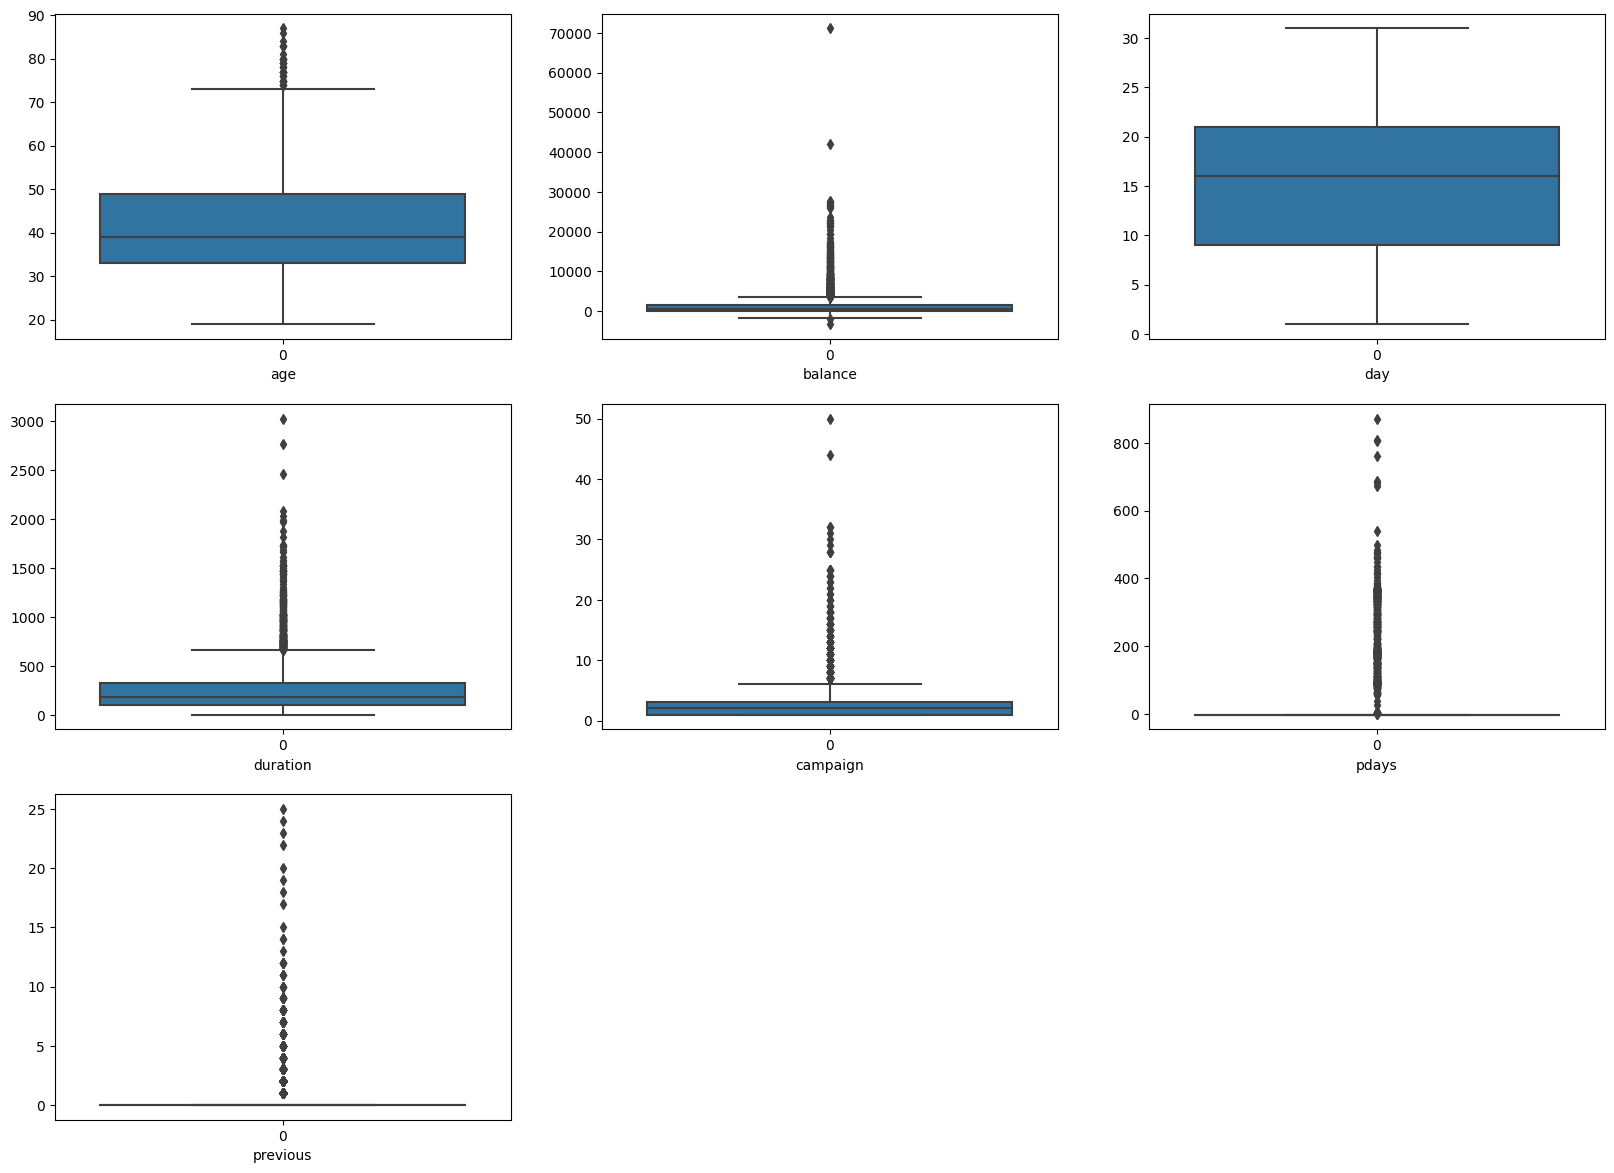

In [7]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in numeric_df.columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

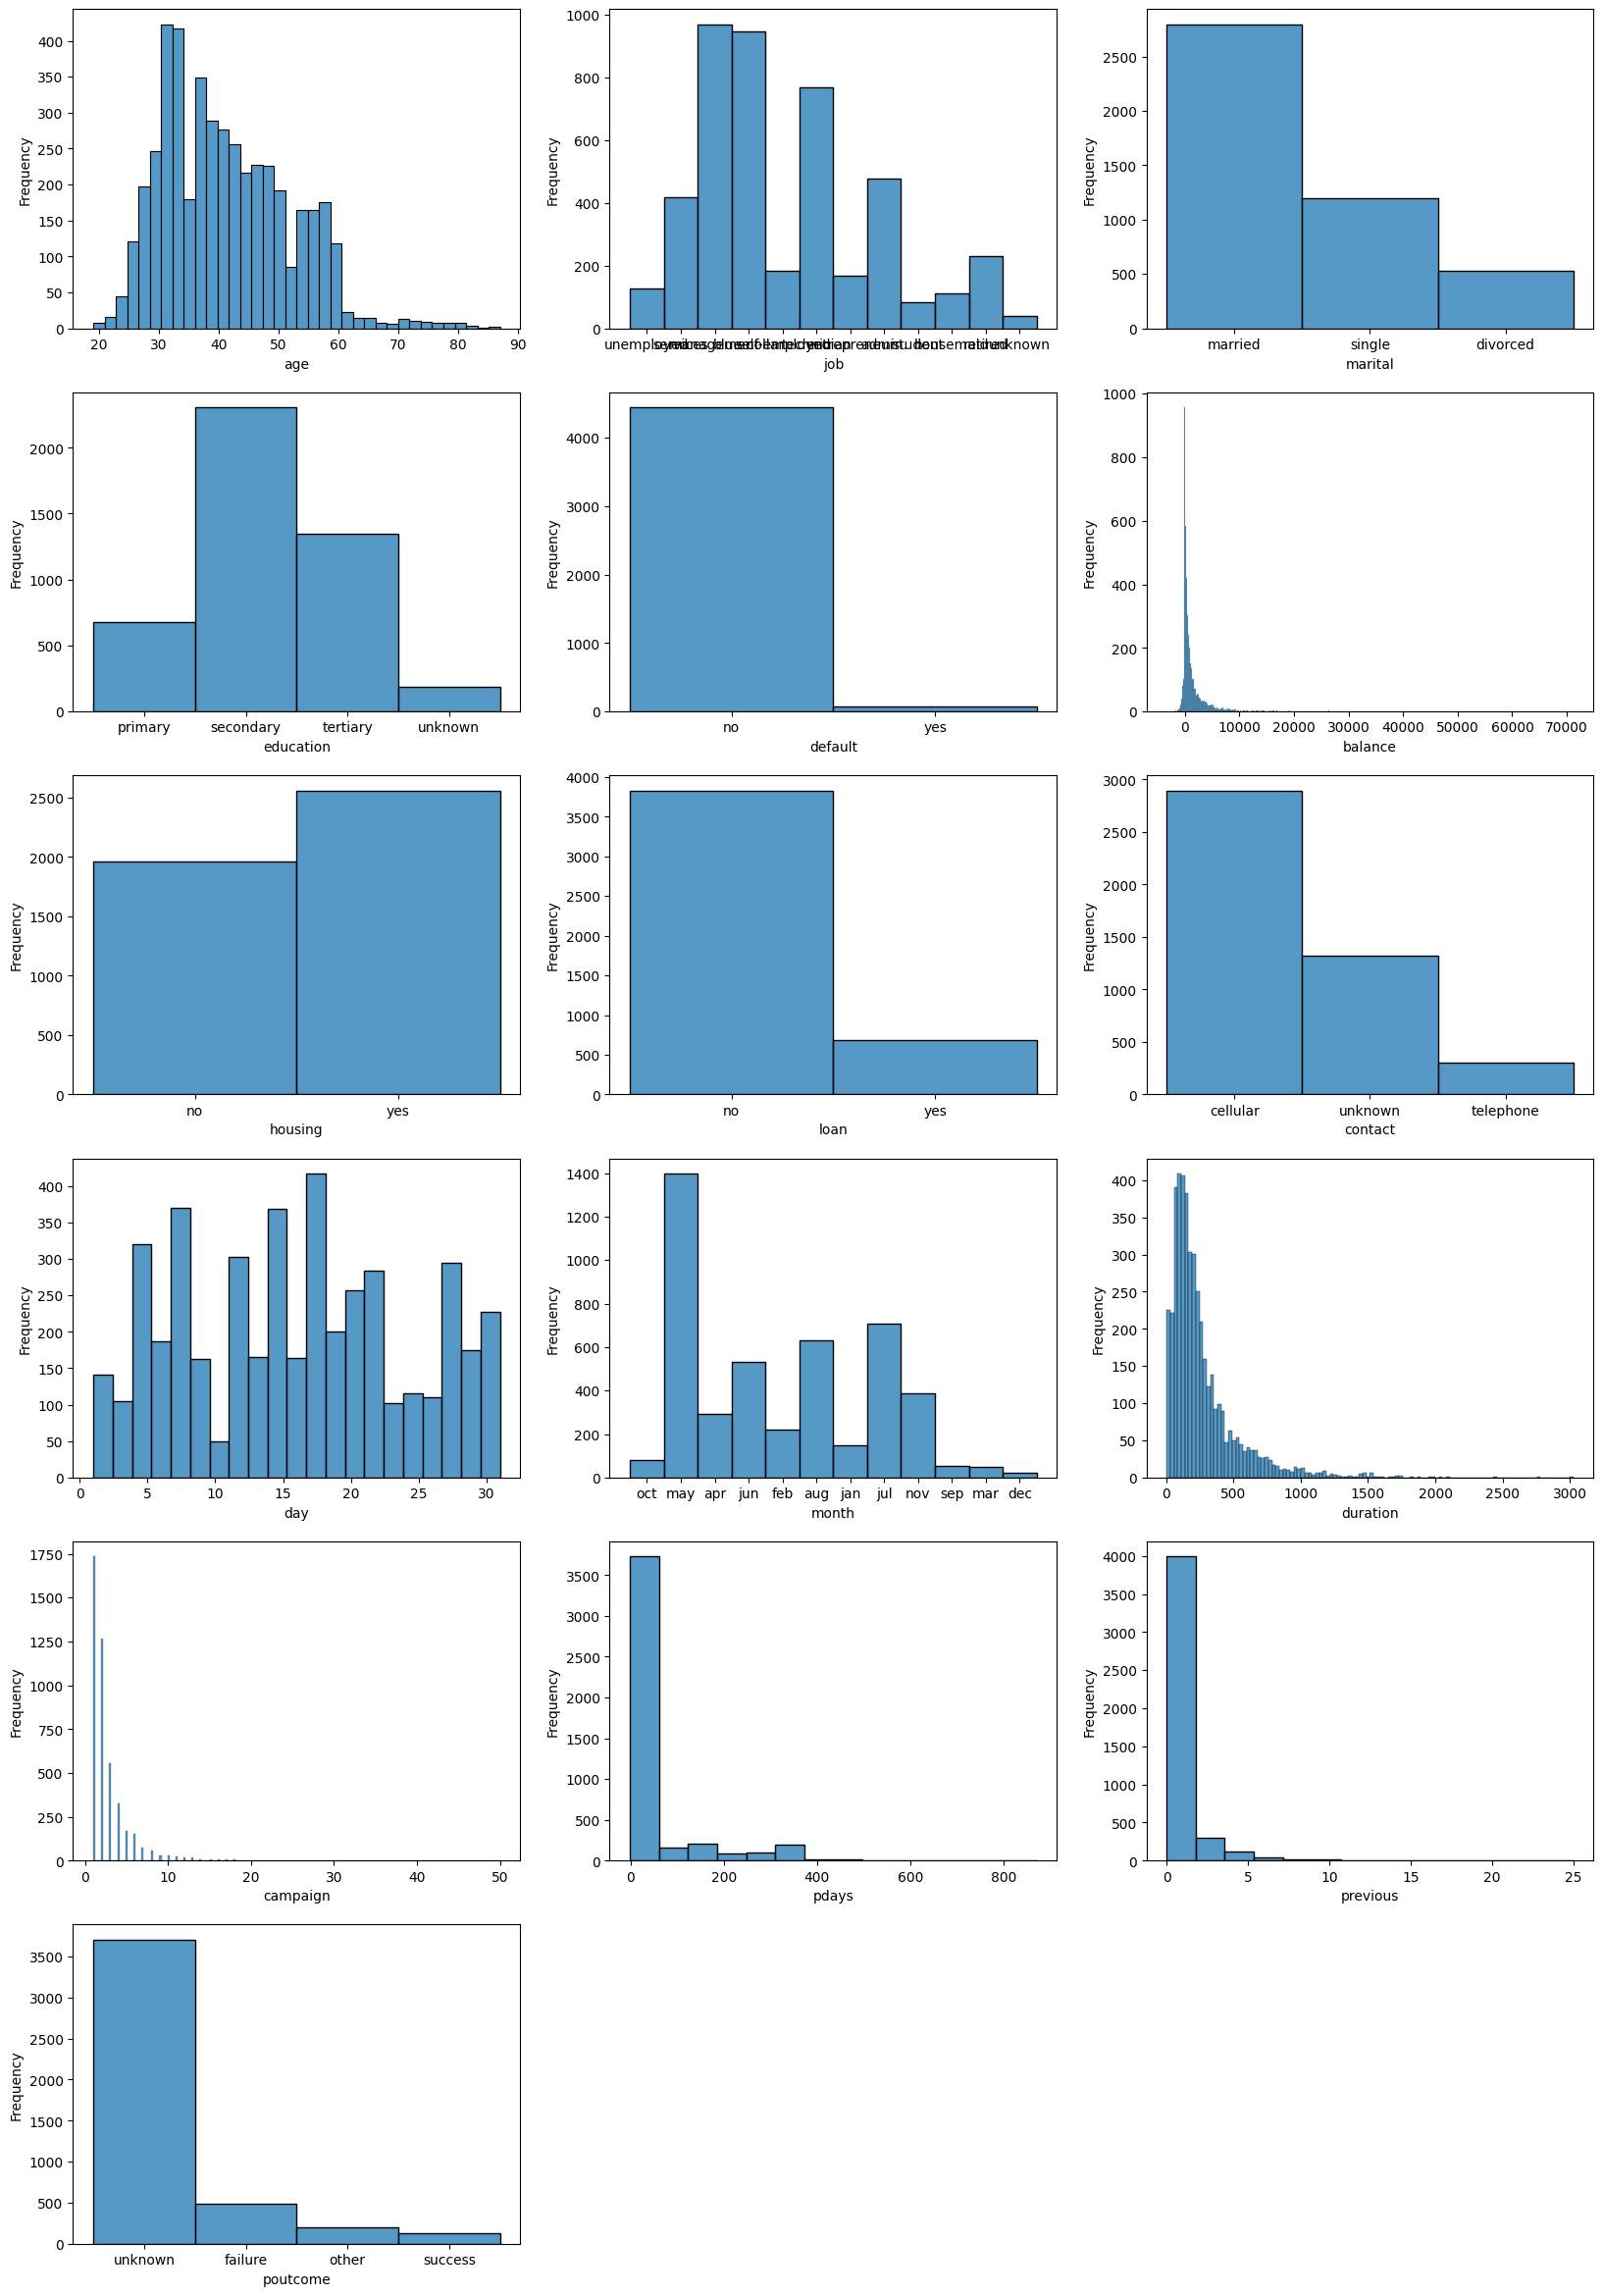

In [8]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data.columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(data[feature], kde=False)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plotnumber+=1
plt.show()

# plt.figure(figsize=(8, 6))
# plt.hist(data[numeric_col], bins=20)
# plt.title('Histogram for ' + numeric_col)
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.show()


# sns.histplot(data[numeric_col], kde=False)
# plt.title('Histogram for ' + numeric_col)
# plt.xlabel('Values')
# plt.ylabel('Frequency')

In [9]:
#Calculating Z-score and removing outliers
z_scores = np.abs(stats.zscore(numeric_df))
threshold = 3
numeric_df = numeric_df[(z_scores < threshold).all(axis=1)]

df = pd.concat([numeric_df, categorical_df], axis=1).dropna()
# df = df.loc[numeric_df.index][numeric_df.all(axis=1)]

categorical_df = df.select_dtypes(include=['object'])

print("Remaining values", numeric_df.shape)
print(df.shape)


Remaining values (3980, 7)
(3980, 17)


In [10]:
print(categorical_df.shape)
print(df.shape)

(3980, 10)
(3980, 17)


In [11]:
print(df.isnull().sum())

age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
tp           0
dtype: int64


In [12]:
summary = df.describe(include='all')
# print the info
info = df.info()

# print the summary
print(newline, bold + "Description" + reset, newline)
print(summary)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3980 entries, 0 to 4519
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3980 non-null   float64
 1   balance    3980 non-null   float64
 2   day        3980 non-null   float64
 3   duration   3980 non-null   float64
 4   campaign   3980 non-null   float64
 5   pdays      3980 non-null   float64
 6   previous   3980 non-null   float64
 7   job        3980 non-null   object 
 8   marital    3980 non-null   object 
 9   education  3980 non-null   object 
 10  default    3980 non-null   object 
 11  housing    3980 non-null   object 
 12  loan       3980 non-null   object 
 13  contact    3980 non-null   object 
 14  month      3980 non-null   object 
 15  poutcome   3980 non-null   object 
 16  tp         3980 non-null   object 
dtypes: float64(7), object(10)
memory usage: 559.7+ KB

 Description 

                age       balance          day     duration   

<Axes: >

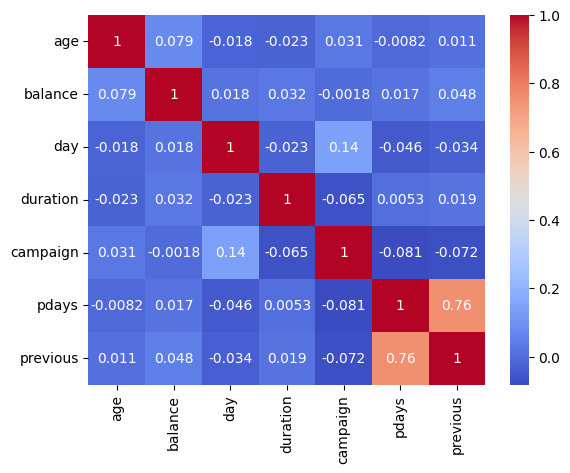

In [13]:
#Visualizing numeric feature correlation
corr_matrix = numeric_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [14]:
#Standardizing the numeric values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)


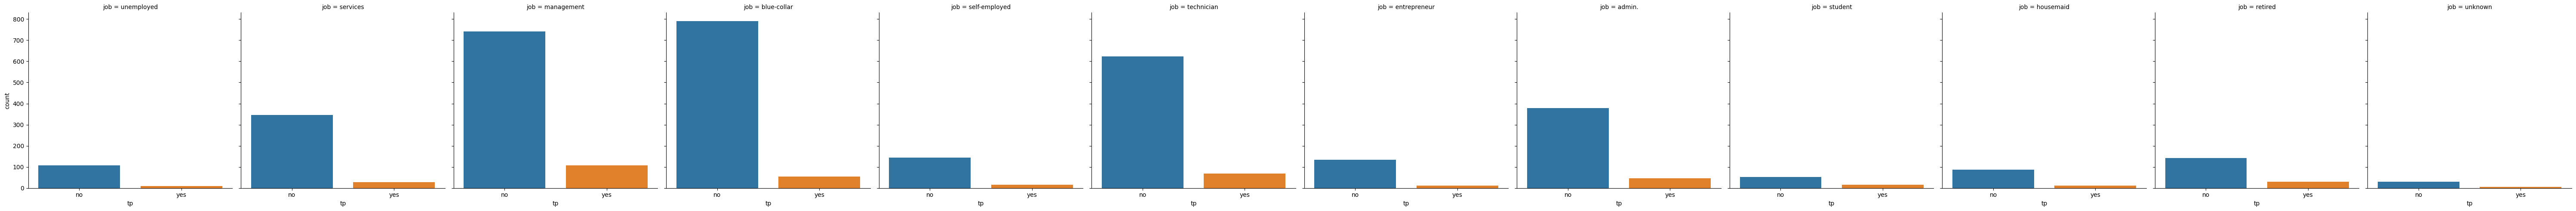

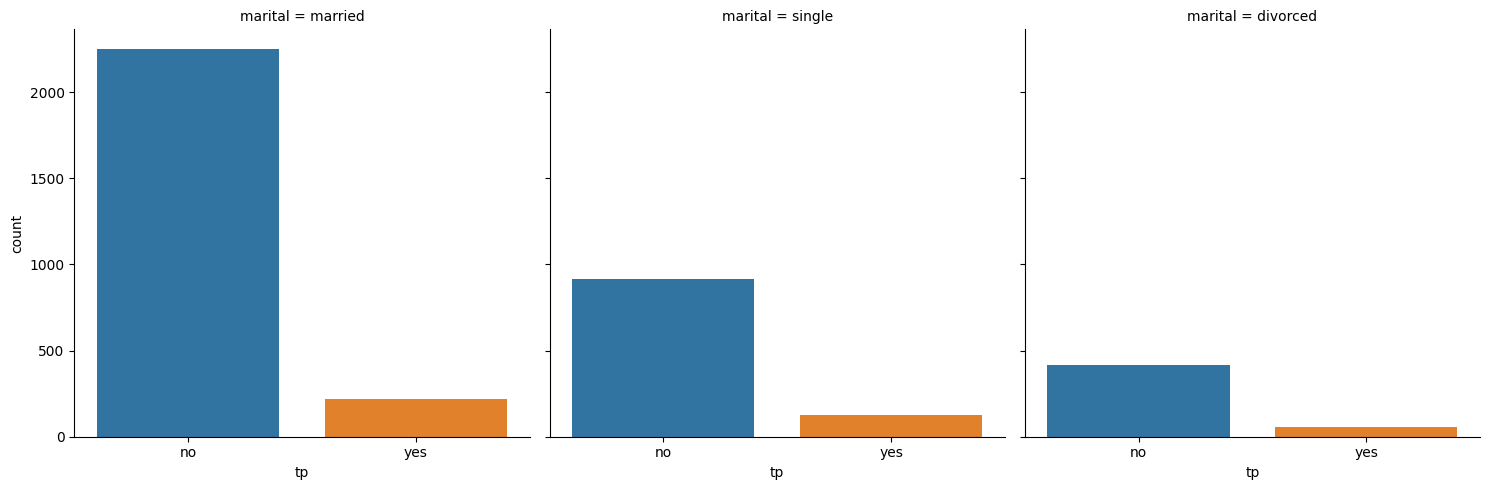

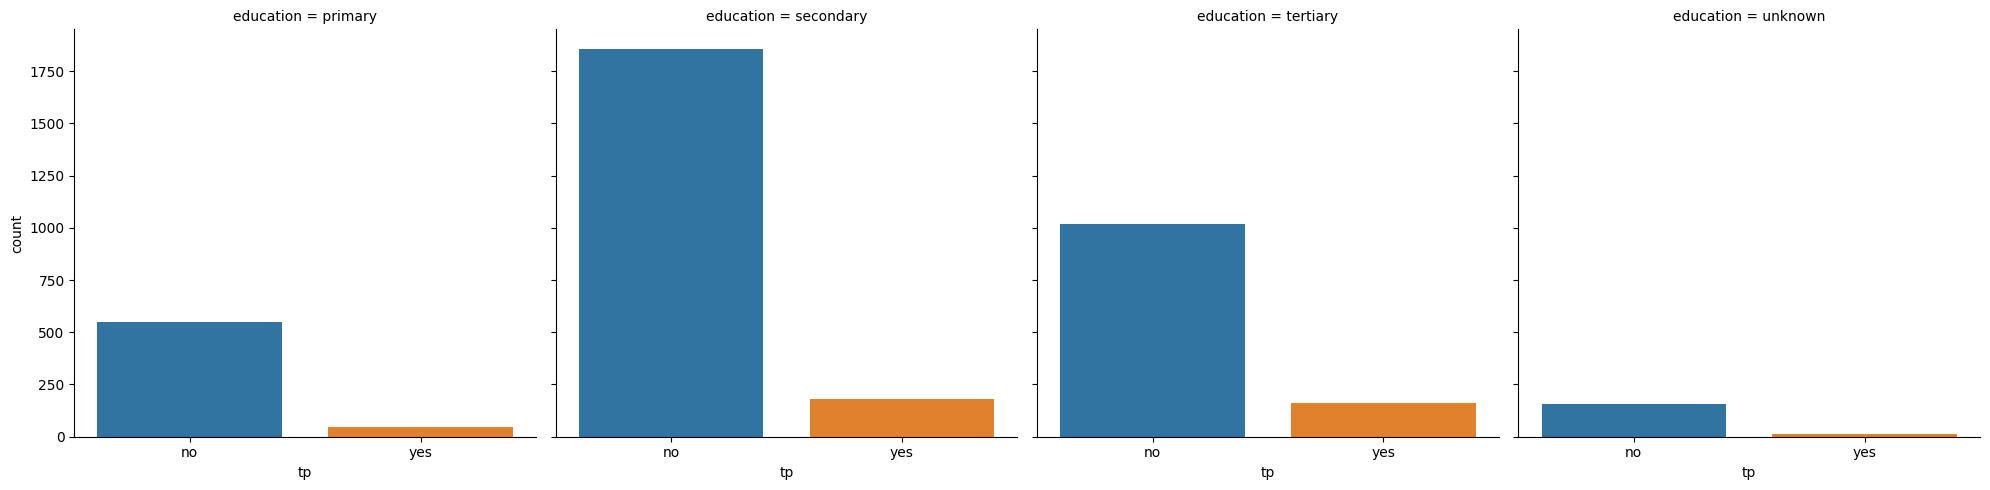

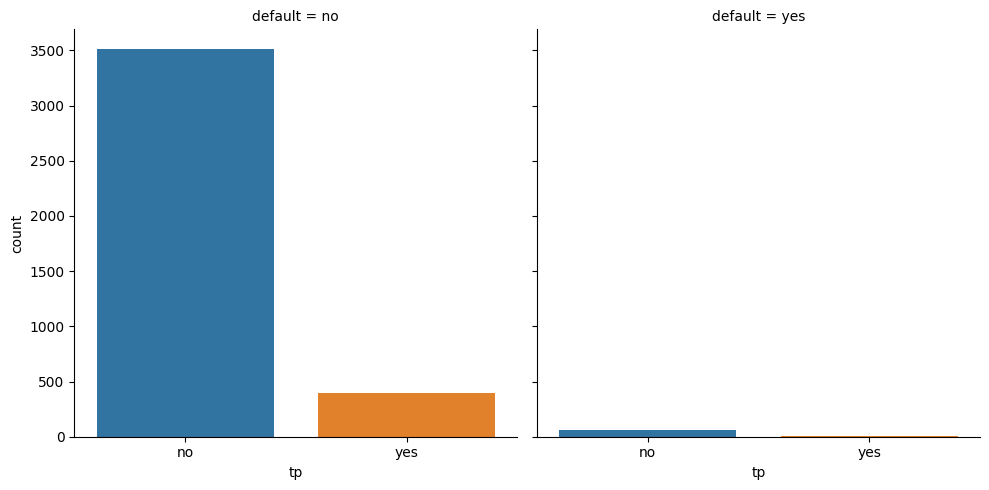

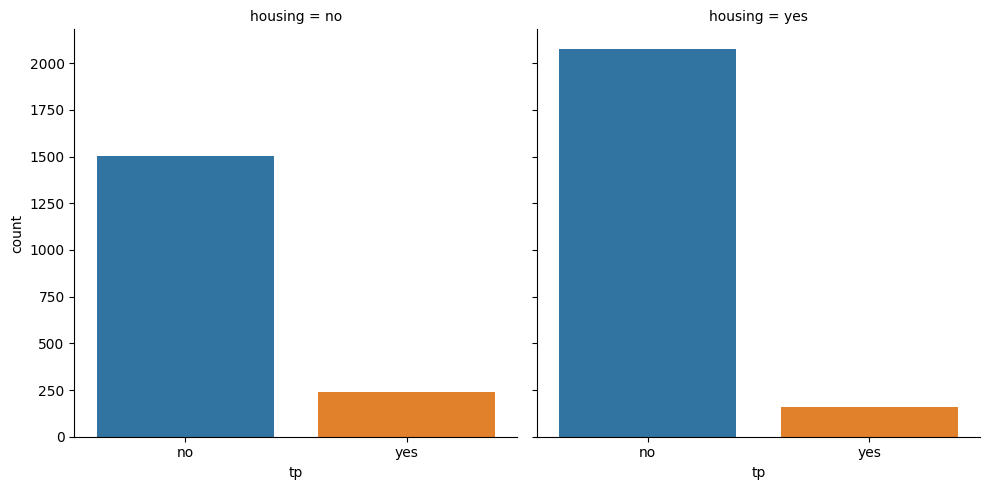

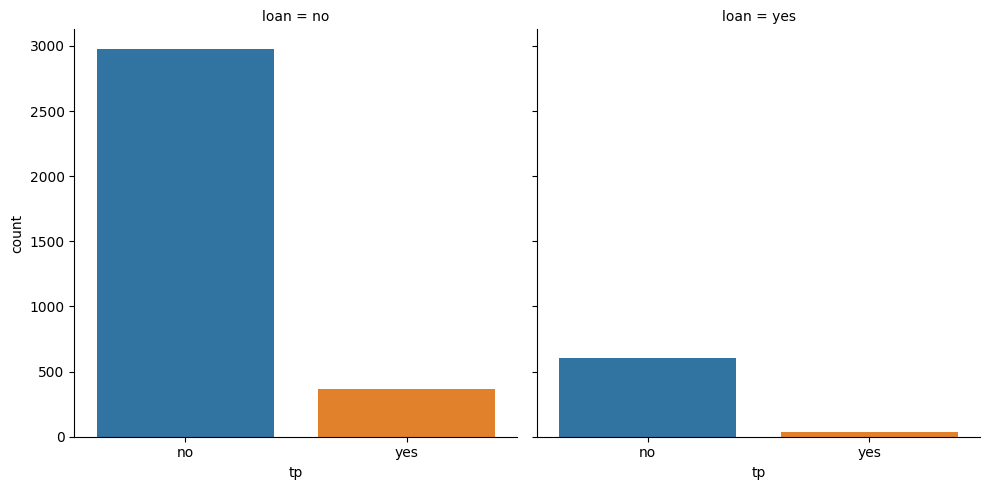

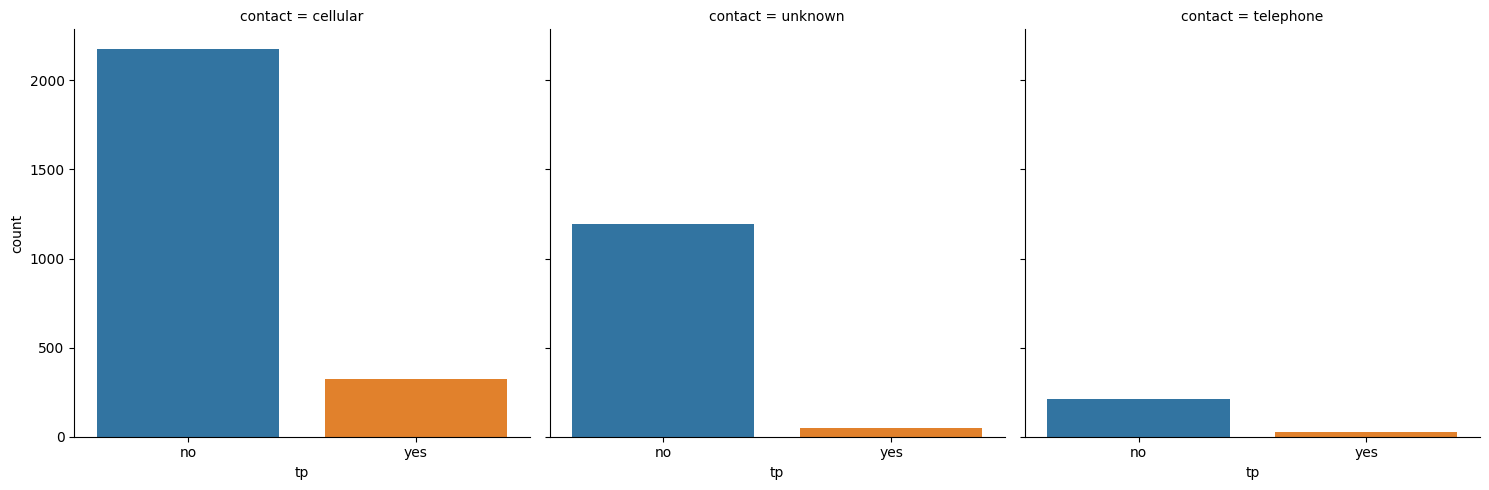

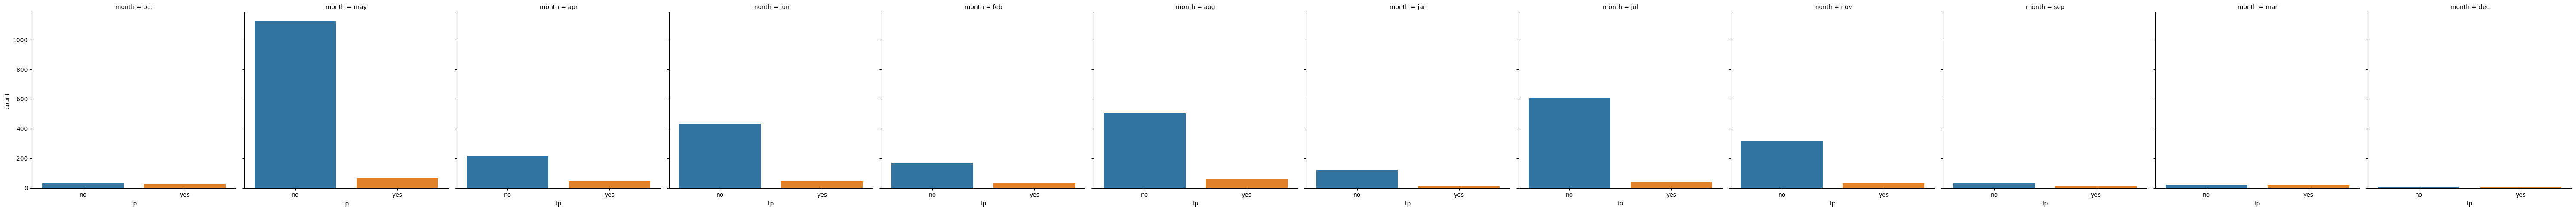

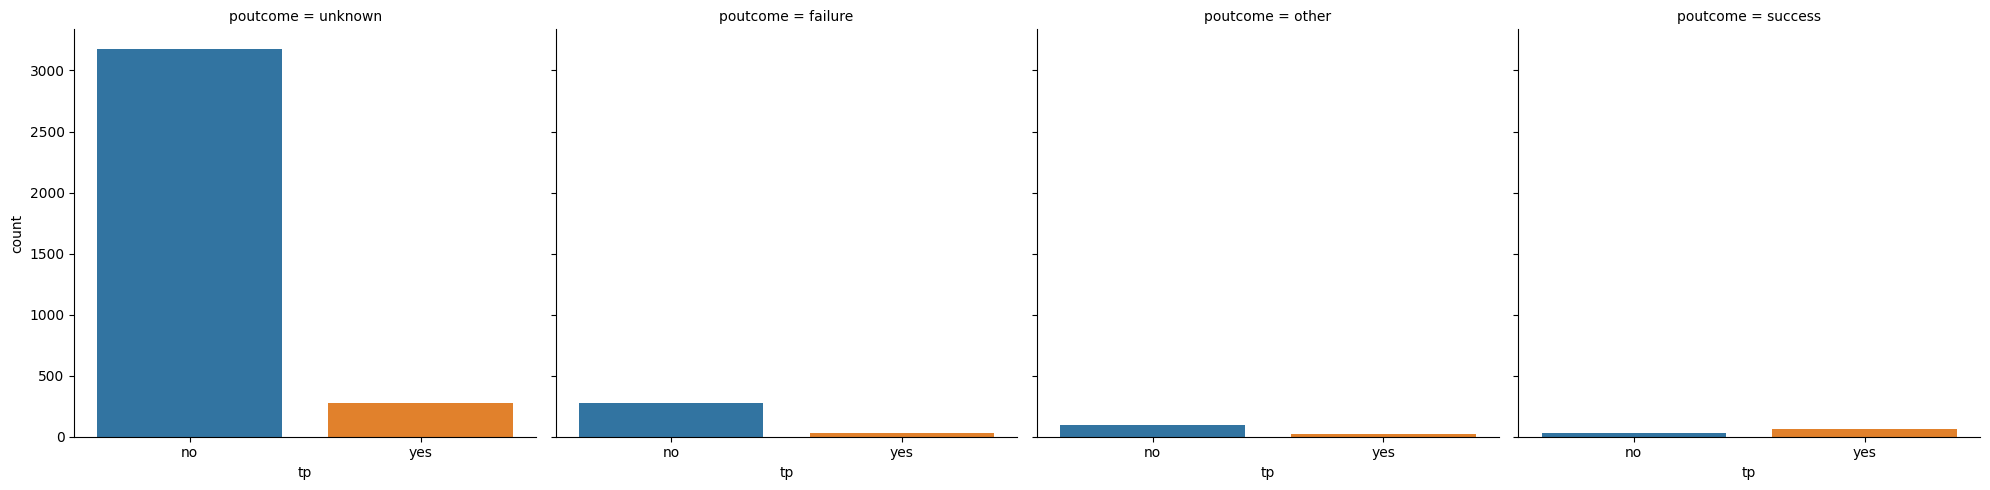

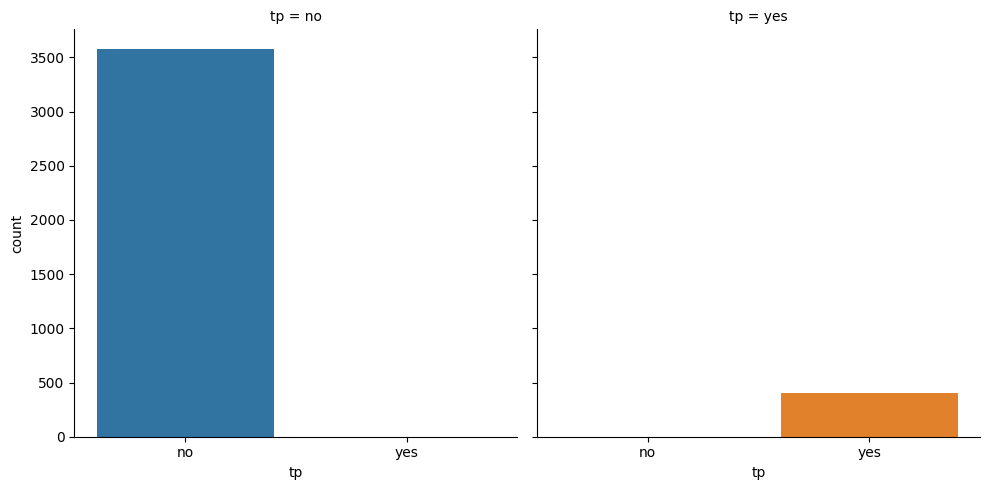

In [16]:
for cat_features in categorical_df:
    sns.catplot(x='tp', col=cat_features, kind='count', data= categorical_df)
plt.show()

In [17]:

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(categorical_df)
# principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# # concatenate the principal components with the target variable
# final_df = pd.concat([principal_df, target], axis=1)

# # visualize the results
# import matplotlib.pyplot as plt

# plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df['PC2'], cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

In [18]:
le = LabelEncoder()
categorical_df = categorical_df.apply(lambda x: le.fit_transform(x))
print(categorical_df)

      job  marital  education  default  housing  loan  contact  month  \
0      10        1          0        0        0     0        0     10   
1       7        1          1        0        1     1        0      8   
2       4        2          2        0        1     0        0      0   
3       4        1          2        0        1     1        2      6   
4       1        1          1        0        1     0        2      8   
...   ...      ...        ...      ...      ...   ...      ...    ...   
4515    7        2          1        0        1     0        0      5   
4516    7        1          1        0        1     0        0      5   
4517    6        1          2        1        1     1        2      8   
4518    9        1          1        0        0     0        0      1   
4519    1        1          1        0        0     0        0      3   

      poutcome  tp  
0            3   0  
1            0   0  
2            0   0  
3            3   0  
4            3   0

In [19]:
new_df = pd.concat([categorical_df, numeric_df], axis=1)
print(new_df)

      job  marital  education  default  housing  loan  contact  month  \
0      10        1          0        0        0     0        0     10   
1       7        1          1        0        1     1        0      8   
2       4        2          2        0        1     0        0      0   
3       4        1          2        0        1     1        2      6   
4       1        1          1        0        1     0        2      8   
...   ...      ...        ...      ...      ...   ...      ...    ...   
4515    7        2          1        0        1     0        0      5   
4516    7        1          1        0        1     0        0      5   
4517    6        1          2        1        1     1        2      8   
4518    9        1          1        0        0     0        0      1   
4519    1        1          1        0        0     0        0      3   

      poutcome  tp  age  balance  day  duration  campaign  pdays  previous  
0            3   0   30     1787   19        7

In [21]:

target = new_df['tp']
new_data = new_df.drop('tp', axis=1)
print(bold + "Target" + reset + newline)
print(target)
print(bold + "New_Data" + reset + newline)
print(new_data)


Target

0       0
1       0
2       0
3       0
4       0
       ..
4515    0
4516    0
4517    0
4518    0
4519    0
Name: tp, Length: 3980, dtype: int64
New_Data

      job  marital  education  default  housing  loan  contact  month  \
0      10        1          0        0        0     0        0     10   
1       7        1          1        0        1     1        0      8   
2       4        2          2        0        1     0        0      0   
3       4        1          2        0        1     1        2      6   
4       1        1          1        0        1     0        2      8   
...   ...      ...        ...      ...      ...   ...      ...    ...   
4515    7        2          1        0        1     0        0      5   
4516    7        1          1        0        1     0        0      5   
4517    6        1          2        1        1     1        2      8   
4518    9        1          1        0        0     0        0      1   
4519    1        1          1   

In [22]:
# # Compute the covariance matrix
# cov = np.cov(new_data.T)

# # Compute the eigenvalues and eigenvectors
# eigenvalues, eigenvectors = np.linalg.eig(cov)

# # Sort the eigenvalues in descending order
# idx = eigenvalues.argsort()[::-1]
# eigenvalues = eigenvalues[idx]
# eigenvectors = eigenvectors[:, idx]

# # Compute the percentage of variance explained by each eigenvalue
# explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# # Plot the scree plot and the cumulative explained variance plot
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# # Scree plot
# ax[0].plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'bo-', linewidth=2)
# ax[0].set_xlabel('Principal Component')
# ax[0].set_ylabel('Proportion of Variance Explained')
# ax[0].set_title('Scree Plot')

# # Cumulative explained variance plot
# ax[1].plot(np.arange(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 'ro-', linewidth=2)
# ax[1].set_xlabel('Number of Principal Components')
# ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
# ax[1].set_title('Cumulative Explained Variance Plot')

# plt.show()

# # Determine the optimal number of principal components
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# optimal_num_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# print("Optimal number of principal components: {}".format(optimal_num_components))



In [23]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.3, random_state=42)


In [24]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X = df.iloc[:,:1]
y = df.iloc[:,:1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree classifier object
decision_tree = DecisionTreeClassifier()

# Train the model using the training sets
decision_tree.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = decision_tree.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.9991624790619765


In [32]:

# Fit PCA with the optimal number of components
from sklearn.pipeline import Pipeline
# Define the number of components for PCA
n_components = 1
# Create the pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('clf', DecisionTreeClassifier())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

#print(bold + "With PCA Accuracy:" + reset + newline)

"""for x in range(1,17):
  pca = PCA(n_components=x)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.fit_transform(X_test)
  # train a KNN classifier on the transformed data
  knn = KNeighborsClassifier(n_neighbors=5)  # set the number of neighbors to use
  knn.fit(X_train_pca, y_train)  # train the KNN classifier on the transformed training data

  # predict the labels of the test data and calculate accuracy
  y_pred = knn.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy:', accuracy, "---- PC", x)"""
  


Accuracy:  0.9991624790619765


In [25]:
#HYPER TUNING 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],                      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],       # Maximum number of features to consider
    'criterion': ['gini', 'entropy'],             # Split criterion
    'splitter': ['best', 'random']                # Split strategy
}

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy: ", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Validation Accuracy:  0.9849246231155779
